In [1]:
import tensorflow

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist

In [4]:
import numpy as np

In [65]:
import time

In [123]:
(x_train,y_train), (x_test,y_test)= mnist.load_data() 
#mnist라는 클래스에서 load_data 함수 불러오기

In [124]:
type(x_train)

numpy.ndarray

In [125]:
x_train.shape 
# 60000개의 이미지
# 사이즈 28*28

(60000, 28, 28)

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt

In [127]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

In [128]:
x_train.shape

(60000, 784)

In [129]:
x_test.shape

(10000, 784)

In [12]:
from sklearn.linear_model import  SGDClassifier

In [13]:
sgd_clf=SGDClassifier()

In [14]:
# Multiclass classfication

In [15]:
# 지금까지는 5 vs. 5가 아닌 것으로만 분류 했는데
# 이제는 10개의 클래스를 모두 고려

In [16]:
sgd_clf.fit(x_train,y_train) # 10개 클래스로 학습 (학습데이터 이용) - 0on-vs-Rest 방법을 이용

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [17]:
sgd_clf.predict([x_test[1,:]])

array([2], dtype=uint8)

In [18]:
y_test[1]

2

In [19]:
#One-vs.-Rest 방법을 이용하기 때문에 confidence score 산출

In [20]:
confidence_score=sgd_clf.decision_function([x_test[1,:]])

In [21]:
confidence_score

array([[ -367338.76761809,  -332048.2642264 ,   424588.52532271,
         -267203.82291879, -1308271.10877806,  -172621.32392891,
         -177836.23084516, -1108316.92457636,  -369266.86619115,
        -1148632.07935268]])

In [22]:
np.argmax(confidence_score)

2

In [23]:
## One-vs-One 방법을 쓰고싶다..

In [24]:
from sklearn.multiclass import OneVsOneClassifier

In [25]:
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

In [26]:
ovo_clf.fit(x_train,y_train)

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [27]:
ovo_clf.predict([x_test[1,:]])

array([2], dtype=uint8)

In [28]:
ovo_clf.estimators_ # 45개의 클래시파이어가 나와있다. 

(SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
        eta0=0.0, fit_intercept=True, l1_ratio=0.15,
        learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
        n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
        tol=None, verbose=0, warm_start=False),
 SGDClassifier(a

In [29]:
type(ovo_clf.estimators_) #튜플의 형태이고(각각의 엘리먼트가 페어와이즈? )

tuple

In [30]:
len(ovo_clf.estimators_) # 총길이는 45

45

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [32]:
cross_val_score(sgd_clf, x_train,y_train,cv=5,scoring='accuracy') # cross-validation = 5

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

array([0.88696377, 0.86727212, 0.8635    , 0.84887889, 0.87487496])

In [33]:
from sklearn.preprocessing import StandardScaler 
#데이터 표준화, 각 데이터의 range나 scale이 다를 수 있으니 표준화시킨다. 

In [34]:
scaler=StandardScaler() # (x-mu(평균))/std(표준편차)

In [35]:
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64)) # 기존의 값을 정수의 형태로 저장

In [36]:
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=5,scoring='accuracy')
# training data의 인풋 밸류를 표준화 시켜야 예측 결과가 좀 더 좋게 나온다. 

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

array([0.91053728, 0.90609898, 0.90691667, 0.90547637, 0.91522174])

In [37]:
## Error analysis (오분류)

1) confusion matrix를 먼저 그리고 <br>
2) 어느 부분이 에러가 났는지? 확인하고 <br>
3) 실제 데이터 (오분류된)로 파악 

In [38]:
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled, y_train, cv=5)

C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Itshony\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

In [39]:
## prediction -> confusion matrix
from sklearn.metrics import confusion_matrix

In [40]:
conf_mx = confusion_matrix(y_train,y_train_pred)

In [41]:
conf_mx

array([[5719,    2,   28,    9,   12,   54,   41,   10,   43,    5],
       [   1, 6457,   47,   29,    6,   40,    6,   13,  131,   12],
       [  54,   38, 5340,  101,   80,   28,   83,   54,  165,   15],
       [  46,   40,  146, 5358,    2,  217,   34,   58,  133,   97],
       [  22,   25,   36,    9, 5363,   12,   51,   31,   88,  205],
       [  70,   41,   34,  197,   77, 4604,  103,   28,  173,   94],
       [  33,   21,   45,    2,   37,   98, 5631,    5,   46,    0],
       [  25,   20,   73,   33,   62,   10,    4, 5790,   20,  228],
       [  52,  139,   66,  158,   12,  160,   54,   26, 5039,  145],
       [  45,   27,   27,   85,  161,   38,    2,  201,   87, 5276]],
      dtype=int64)

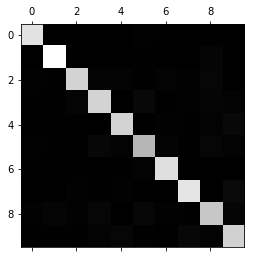

In [42]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()
# 숫자가 높으면 밝게 아니면 어둡게 

In [43]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [44]:
norm_conf_mx

array([[9.65557994e-01, 3.37666723e-04, 4.72733412e-03, 1.51950025e-03,
        2.02600034e-03, 9.11700152e-03, 6.92216782e-03, 1.68833361e-03,
        7.25983454e-03, 8.44166807e-04],
       [1.48323939e-04, 9.57727677e-01, 6.97122516e-03, 4.30139425e-03,
        8.89943637e-04, 5.93295758e-03, 8.89943637e-04, 1.92821121e-03,
        1.94304361e-02, 1.77988727e-03],
       [9.06344411e-03, 6.37797919e-03, 8.96273917e-01, 1.69519973e-02,
        1.34273246e-02, 4.69956361e-03, 1.39308493e-02, 9.06344411e-03,
        2.76938570e-02, 2.51762336e-03],
       [7.50285435e-03, 6.52422117e-03, 2.38134073e-02, 8.73919426e-01,
        3.26211059e-04, 3.53938999e-02, 5.54558800e-03, 9.46012070e-03,
        2.16930354e-02, 1.58212363e-02],
       [3.76583362e-03, 4.27935638e-03, 6.16227319e-03, 1.54056830e-03,
        9.18007532e-01, 2.05409106e-03, 8.72988702e-03, 5.30640192e-03,
        1.50633345e-02, 3.50907224e-02],
       [1.29127467e-02, 7.56318023e-03, 6.27190555e-03, 3.63401586e-02,
   

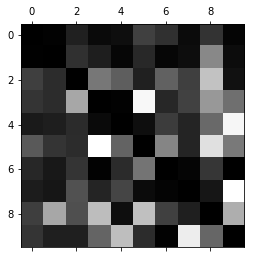

In [45]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
# 밝게 나올 수록 오분류가 많이 난 것들 
# 3-> 5
# 5-> 3
# 4-> 9
# 7-> 9
# 9-> 7

In [46]:
# 원래는 각 오류가 난 인덱스를 하나하나 찾아서 봐야 하지만
# 이를 함수화 시켜줌 
def plot_digits(instances, images_per_row=10,**options):
    size=28
    images_per_row=min(len(instances),images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1)// images_per_row +1
    row_images=[]
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)* images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,**options)
    plt.axis("off")

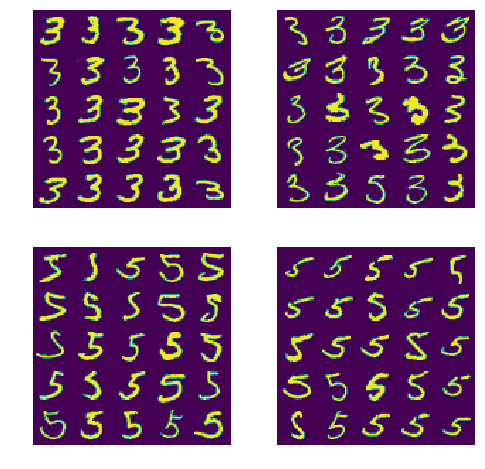

In [47]:
cl_a, cl_b = 3,5
x_aa = x_train[(y_train ==cl_a)&(y_train_pred == cl_a)] # 실제로 3인데 3으로 분류된 것 
x_ab = x_train[(y_train ==cl_a)&(y_train_pred == cl_b)] # 실제로 3인데 5로 분류된 것
x_ba = x_train[(y_train ==cl_b)&(y_train_pred == cl_a)] # 실제로 5인데 3으로 분류된 것
x_bb = x_train[(y_train ==cl_b)&(y_train_pred == cl_b)] # 실제로 5인데 5로 분류된 것
plt.figure(figsize=(8,8)) 

# 다 부른 게 아니라 처음부터 25개인 것만 불러옴
plt.subplot(221); plot_digits(x_aa[:25],images_per_row=5) 
plt.subplot(222); plot_digits(x_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25],images_per_row=5)
plt.show()

결론 <br>
1) 눈으로 봤을때 구분이 되는데 구분을 못하는 걸 보니 모델의 성능이 떨어진다 <br>
아마 linear model 이라 복잡한 부분 을 못잡았기 때문이지 않을까 하는 생각 <br>
2) 전처리를 할 때 rotation, shift (중심축을 옮기면/약간의 회전을 시키면) 더 좋은 모델이 나오지 않을까 <br>
3) 모델을 비선형으로 만들면 더 좋지 않을까 

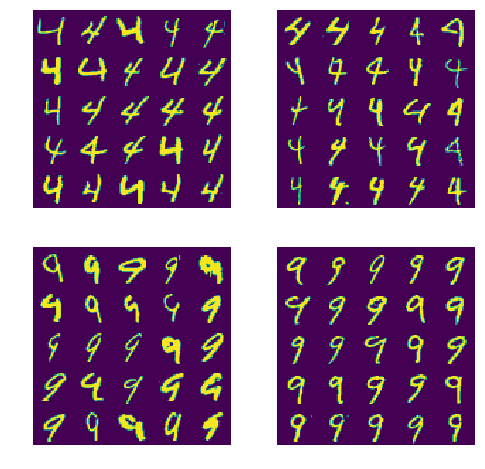

In [48]:
cl_a, cl_b = 4,9
x_aa = x_train[(y_train ==cl_a)&(y_train_pred == cl_a)] # 실제로 3인데 3으로 분류된 것 
x_ab = x_train[(y_train ==cl_a)&(y_train_pred == cl_b)] # 실제로 3인데 5로 분류된 것
x_ba = x_train[(y_train ==cl_b)&(y_train_pred == cl_a)] # 실제로 5인데 3으로 분류된 것
x_bb = x_train[(y_train ==cl_b)&(y_train_pred == cl_b)] # 실제로 5인데 5로 분류된 것
plt.figure(figsize=(8,8)) 

# 다 부른 게 아니라 처음부터 25개인 것만 불러옴
plt.subplot(221); plot_digits(x_aa[:25],images_per_row=5) 
plt.subplot(222); plot_digits(x_ab[:25],images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25],images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25],images_per_row=5)
plt.show()

# 1. 97% 정확도의 MNIST 분류기

## KNeighborsClassifier로 예측

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [50]:
from sklearn.metrics import accuracy_score

In [73]:
knn_clf = KNeighborsClassifier(n_neighbors=4,weights='distance',n_jobs=-1)

In [80]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [81]:
y_pred = knn_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9714

## CNN으로 예측 

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [84]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [85]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              3137000   
__________

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1885 - acc: 0.9414 - val_loss: 0.0444 - val_acc: 0.9857
Epoch 2/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0607 - acc: 0.9809 - val_loss: 0.0344 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0445 - acc: 0.9858 - val_loss: 0.0300 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0377 - acc: 0.9883 - val_loss: 0.0230 - val_acc: 0.9921
Epoch 5/12
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0324 - acc: 0.9894 - val_loss: 0.0258 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0262 - acc: 0.9914 - val_loss: 0.0220 - val_acc: 0.9926
Epoch 7/12
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0228 - acc: 0.9925 - val_loss: 0.0238 - 

한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. <br>
즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태

In [87]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02262855282882574
Test accuracy: 0.994


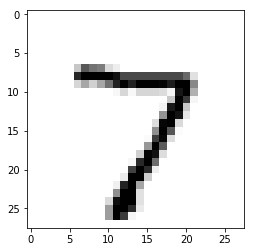

The Answer is  [7]


In [88]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

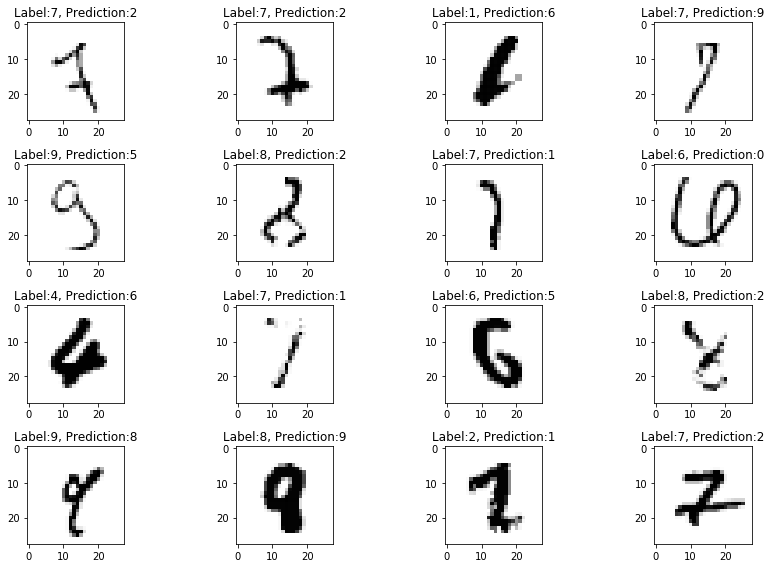

In [94]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.sample(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

# 2. 데이터 증식

In [51]:
from scipy.ndimage.interpolation import shift

In [130]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

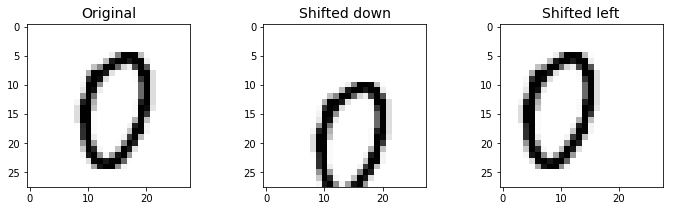

In [110]:
image = x_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [131]:
X_train_augmented = [image for image in x_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(x_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [132]:
# permutation  랜덤으로 섞은 배열만을 다시 반환해준다.(원본은 유지)
# suffle 은 랜덤으로 섞은 배열을 반환하는 건 같지만, 원본 자체를 바꾼다. 

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [133]:
X_train_augmented.shape

(300000, 784)

In [134]:
y_train_augmented.shape

(300000,)

In [135]:
x_train.shape

(60000, 784)

In [136]:
y_train.shape

(60000,)

In [137]:
# n_neighbors는 가장 가까운 이웃을 몇개를 고를지에 대한 parameter며
# n_jobs는 사용할 cpu 코어의 갯수 입니다. -1이면 모든 코어를 사용합니다.
knn_clf = KNeighborsClassifier(n_neighbors=4,weights='distance',n_jobs=-1)

In [138]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [139]:
y_pred = knn_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9763